<a href="https://colab.research.google.com/github/gmsft/csmath/blob/master/hw1curvefitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework1
polynomial curve fitting

1.sample the function curve of y=sin(x) with Gaussian noise

按照正弦函数生成样本点，并在y轴方向上添加高斯噪声

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import random

def create_data(n):
  x = np.linspace(0,2*np.pi,n)
  y = np.sin(x)
  return x,y
def draw_scatter(x,y,c='blue'):
  plt.scatter(x,y,c=c)
  return
def add_noise(y,sigma=0.13,mu=0):
  size = y.shape[0]
  for i in range(size):
    y[i]+=random.gauss(mu,sigma)
  return y

# print('x=',x)
# print('y=',y)
# for e in x:
#   print(e)



2.使用最小二乘法求解权重向量

In [229]:
# 求解w,la控制正则项
def get_w(x,y,m,n,la):
  x_matrix = np.empty([n,m+1])
  for row in range(n):
    for col in range(m+1):
      x_matrix[row,col]=np.power(x[row],col)
  # print('x=',x)
  # print('x_matrix=',x_matrix)
  y_matrix = np.empty([n,1])
  for r in range(n):
    y_matrix[r,0] = y[r]
  # print('newytype:',new_y.shape)
  xT= x_matrix.T
  # print('x=',x)
  # print('xTtype:',type(xT))
  # print('xT=',xT)
  xTx = np.dot(np.matrix(xT),np.matrix(x_matrix))
  laI = la*np.ones([m+1,m+1])
  xTx_laI = xTx+laI
  # print('xTx.shape=',xTx.shape)
  xTx_laI_1=(xTx_laI).I
  # print(type(xTx_1))
  xTx_1xT = np.dot(xTx_laI_1,np.matrix(xT))
  # print('np.matrix(new_y):',type(np.matrix(new_y)))
  w = np.dot(xTx_1xT,np.matrix(y_matrix))
  # print('type(w)',type(w))

  # print('w=',w)
  # print('w.shape=',w.shape[0])
  # print('w3=',w[3,0])
  # print('w.tonumpy=',w.getA)
  return w

3.拟合




In [230]:
def simulate_y(x,w):
  # print('x0',x[0])
  # print('w0',w[0])
  # print('w.shape',w.shape)
  y_list=[]
  for ex in x:
    y=0
    for idx in range(w.shape[0]):
      y += np.power(ex,idx)*w[idx,0]
      # print('y=',w[idx],'*',ex,'^',idx)
    y_list.append(y)
  return np.array(y_list)

# n为样本点的数量，m为多项式的最高次数
def fit_curve(n, m, la=0):
  # n=10
  # m=3

  x,y = create_data(n)
  new_y = y.copy()
  add_noise(new_y)
  w = get_w(x,new_y,m,n, la)
  draw_scatter(x,y)
  draw_scatter(x,new_y,'red')

  draw_scatter(x,y)
  draw_scatter(x,new_y,'red')
  sample_x = np.arange(0,2*np.pi,0.1)
  simulated_y = simulate_y(sample_x,w)
  # print('simulated_y=',simulated_y)
  plt.plot(sample_x,np.sin(sample_x),color='green')

  plt.plot(sample_x,simulated_y,color='red')
  plt.title('M={}, N={}, lambda={}'.format(m,n,la))
  plt.show()

4.画图

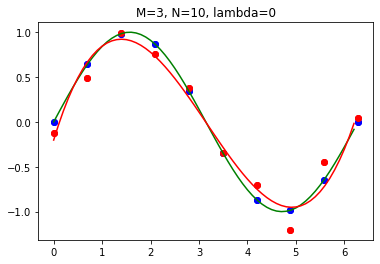

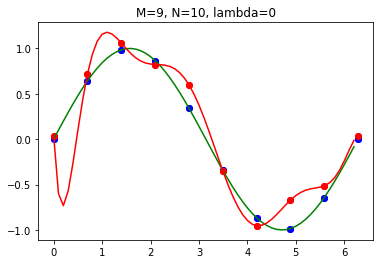

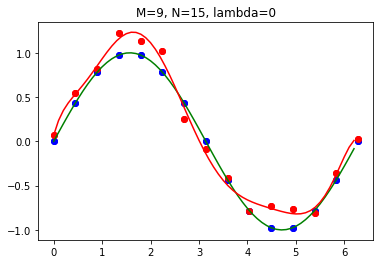

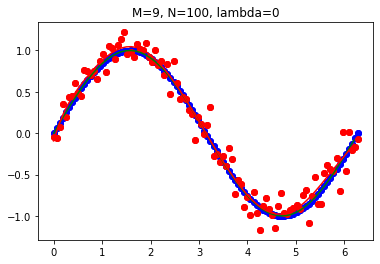

带正则化


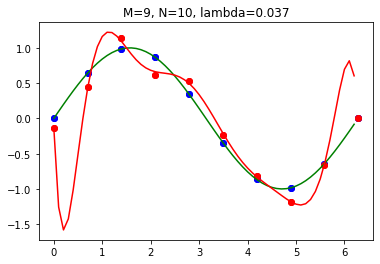

In [231]:
fit_curve(10,3)
fit_curve(10,9)

fit_curve(15,9)
fit_curve(100,9)

print("带正则化")
fit_curve(10,9,0.037)